# Authors: 
**Alejandro C Parra** https://github.com/athanatos96


**Atreish Ramlakhan** https://github.com/atreish


**Ruslan Gokhman** https://github.com/Gokhman07

# 29. Divide Two Integers

Given two integers dividend and divisor, divide two integers without using multiplication, division, and mod operator.

The integer division should truncate toward zero, which means losing its fractional part. For example, 8.345 would be truncated to 8, and -2.7335 would be truncated to -2.

Return the quotient after dividing dividend by divisor.

Note: Assume we are dealing with an environment that could only store integers within the 32-bit signed integer range: [−2^31, 2^31 − 1]. For this problem, if the quotient is strictly greater than 2^31 - 1, then return 2^31 - 1, and if the quotient is strictly less than -2^31, then return -2^31.

In [8]:
class Solution:
    def divide(self, dividend: int, divisor: int) -> int:
        # Calculate the Sign of the output
        positive_sign = (dividend > 0 and divisor > 0) or (dividend < 0 and divisor < 0)
        
        # Calculate the 32-bit absolute value of the inputs. 
        '''
        If the value is -2**31 ==> abs(-2**31) = 2**31 which is above the range of a 
        32-bit signed integer ( range: [−2**31, 2**31 − 1] ).
        This is the only case in which the abs will overflow the 32-bit Integer.
        So we check if this is the value, and if it is, we such assing the closest value
        inside the range 2**31 - 1.
        '''
        abs_dividend = (2**31 - 1) if (dividend == -2**31 and positive_sign) else abs(dividend)
        abs_divisor = (2**31 - 1) if (divisor == -2**31  and positive_sign) else abs(divisor)
        
        # Main Loop, calculate the quotient 
        '''
        Iterate substracting each time the divisor to the dividend

        Each time double the value of the dividend by adding to itself.
        Also double the value of the count by adding to itself.
        When we go out of range, reset the divisor to the original value 
        and the counter to 1, and restart the process
        '''
        quotient = 0
        while abs_dividend >= abs_divisor:
            abs_divisor_2 = abs_divisor
            count = 1
            while abs_dividend >= abs_divisor_2:
                quotient += count
                count += count
                abs_dividend -= abs_divisor_2
                abs_divisor_2 += abs_divisor_2

        # Return the signed version of the quotient
        if positive_sign:
            return quotient
        else:
            return -quotient

In [9]:
solver = Solution

dividend = 10
divisor = 3
print(f"dividend: {dividend}, divisor: {divisor}, Output: {solver.divide(solver, dividend, divisor)}")

dividend = 7
divisor = -3
print(f"dividend: {dividend}, divisor: {divisor}, Output: {solver.divide(solver, dividend, divisor)}")

dividend: 10, divisor: 3, Output: 3
dividend: 7, divisor: -3, Output: -2


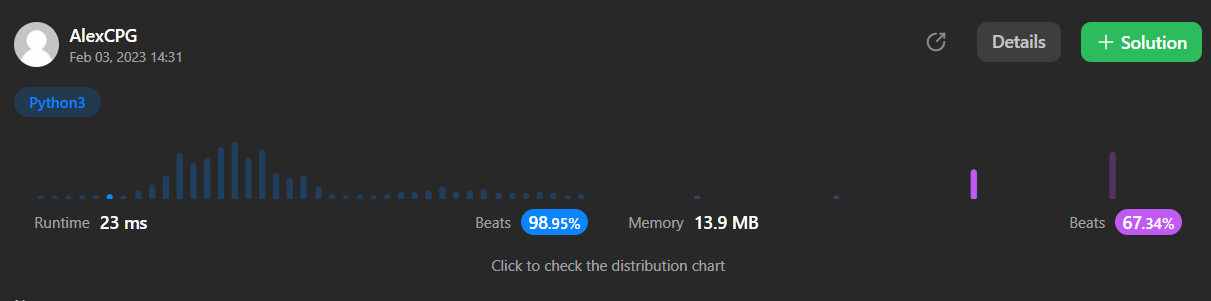